In [1]:
from yahoo_fin.stock_info import *
import datetime as dt

#Determine the ticker that will be used to analyze
ticker = input('Please select a ticker symbol: ')

#Determine the sample size of stocks
end = dt.datetime.now()
start = end - dt.timedelta(days=100)

print(start)
print(end)

Please select a ticker symbol:  TSLA


2023-10-24 17:26:08.837575
2024-02-01 17:26:08.837575


In [2]:
price = get_live_price(f'{ticker}')
print(f'${price:.2f}')

#If you get a warning about deprecation, just ignore.

$188.86


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


In [3]:
data = get_data(ticker, start_date = start, end_date = end, index_as_date = True, interval = '1d')
print(data)

                  open        high         low       close    adjclose  \
2023-10-24  216.500000  222.050003  214.110001  216.520004  216.520004   
2023-10-25  215.880005  220.100006  212.199997  212.419998  212.419998   
2023-10-26  211.320007  214.800003  204.880005  205.759995  205.759995   
2023-10-27  210.600006  212.410004  205.770004  207.300003  207.300003   
2023-10-30  209.279999  210.880005  194.669998  197.360001  197.360001   
...                ...         ...         ...         ...         ...   
2024-01-26  185.500000  186.779999  182.100006  183.250000  183.250000   
2024-01-29  185.630005  191.479996  183.669998  190.929993  190.929993   
2024-01-30  195.330002  196.360001  190.610001  191.589996  191.589996   
2024-01-31  187.000000  193.970001  185.850006  187.289993  187.289993   
2024-02-01  188.500000  189.869995  184.279999  188.860001  188.860001   

               volume ticker  
2023-10-24  118231100   TSLA  
2023-10-25  107065100   TSLA  
2023-10-26  115112

After getting your intended stock data, we will plot these points onto a graph to better analyze all of this data. The data is also structured in a pandas dataframe.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
plot_point = 'close'

matplotlib is now imported which will be utilized to plot our current close stock prices.

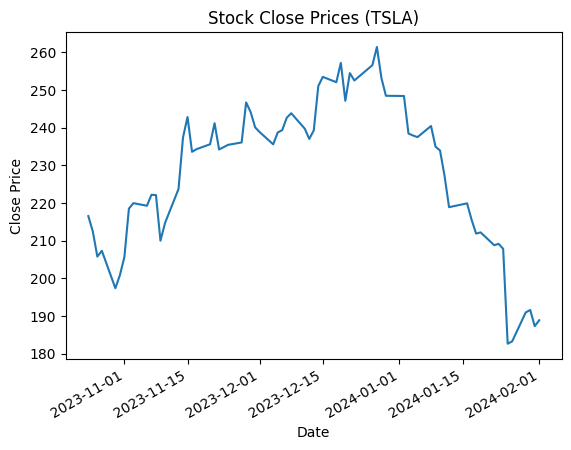

In [5]:
df = data
df[f'{plot_point}'].plot(label=f'{plot_point.capitalize()} Prices')
plt.xlabel('Date')
plt.ylabel(f'{plot_point.capitalize()} Price')
plt.yscale('linear')
plt.title(f'Stock {plot_point.capitalize()} Prices ({ticker})')
plt.show()

## Utilizing ML to predict stocks closing price.

In [6]:
import xgboost as xgb

#Gather data to train and test the AI
print(data)

                  open        high         low       close    adjclose  \
2023-10-24  216.500000  222.050003  214.110001  216.520004  216.520004   
2023-10-25  215.880005  220.100006  212.199997  212.419998  212.419998   
2023-10-26  211.320007  214.800003  204.880005  205.759995  205.759995   
2023-10-27  210.600006  212.410004  205.770004  207.300003  207.300003   
2023-10-30  209.279999  210.880005  194.669998  197.360001  197.360001   
...                ...         ...         ...         ...         ...   
2024-01-26  185.500000  186.779999  182.100006  183.250000  183.250000   
2024-01-29  185.630005  191.479996  183.669998  190.929993  190.929993   
2024-01-30  195.330002  196.360001  190.610001  191.589996  191.589996   
2024-01-31  187.000000  193.970001  185.850006  187.289993  187.289993   
2024-02-01  188.500000  189.869995  184.279999  188.860001  188.860001   

               volume ticker  
2023-10-24  118231100   TSLA  
2023-10-25  107065100   TSLA  
2023-10-26  115112

In [7]:
#Training and testing datasets
training_data = data.iloc[:int(.5*len(data)), :]
testing_data = data.iloc[int(.5*len(data)):, :]

We split the first half of the data as training data for the model. Then the latter half will be used as test data to predict the close prices. The model uses the open and volume data from the testing data.

In [8]:
#Define features and target variable (the predictor)
features = ['open', 'volume']
target = 'close'

In [9]:
#Create and train model
model = xgb.XGBRegressor()
model.fit(training_data[features], training_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

The model then uses regression modeling from XGBoost to predict the last half of the data.

In [10]:
#Making the prediction based on test data
predictions = model.predict(testing_data[features])
print('Model predictions: ')
print(predictions)

Model predictions: 
[240.49051 238.15804 243.9002  244.13881 240.16742 241.86053 242.55507
 241.86053 240.25476 240.25476 241.86053 240.36557 242.00702 241.86053
 238.93669 240.49051 238.73328 234.76523 240.49051 235.64227 222.01639
 220.50005 215.24904 215.60652 214.29509 198.00824 209.104   206.41064
 210.09297 200.21199 200.85242 201.94327 200.83994 200.85242 201.74138]


In [11]:
#Actual Data Comparison
print('Actual Data:')
print(testing_data[target])

Actual Data:
2023-12-12    237.009995
2023-12-13    239.289993
2023-12-14    251.050003
2023-12-15    253.500000
2023-12-18    252.080002
2023-12-19    257.220001
2023-12-20    247.139999
2023-12-21    254.500000
2023-12-22    252.539993
2023-12-26    256.609985
2023-12-27    261.440002
2023-12-28    253.179993
2023-12-29    248.479996
2024-01-02    248.419998
2024-01-03    238.449997
2024-01-04    237.929993
2024-01-05    237.490005
2024-01-08    240.449997
2024-01-09    234.960007
2024-01-10    233.940002
2024-01-11    227.220001
2024-01-12    218.889999
2024-01-16    219.910004
2024-01-17    215.550003
2024-01-18    211.880005
2024-01-19    212.190002
2024-01-22    208.800003
2024-01-23    209.139999
2024-01-24    207.830002
2024-01-25    182.630005
2024-01-26    183.250000
2024-01-29    190.929993
2024-01-30    191.589996
2024-01-31    187.289993
2024-02-01    188.860001
Name: close, dtype: float64


In [12]:
#Model Accuracy
accuracy = model.score(testing_data[features], testing_data[target])
print('Accuracy Score: ')
print(f'{accuracy:.2f}')

Accuracy Score: 
0.84


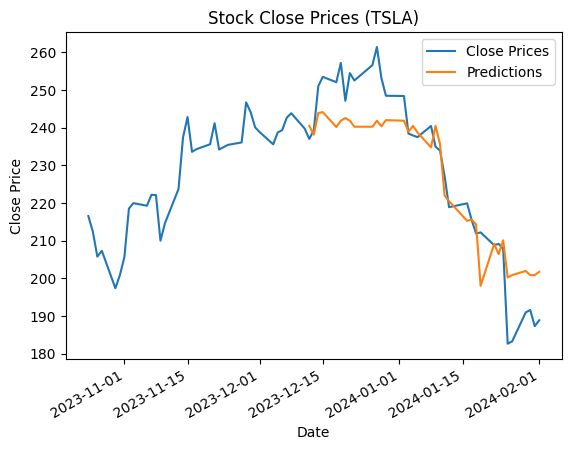

In [13]:
#Compare with original plot data and prediction data
df[f'{plot_point}'].plot(label=f'{plot_point.capitalize()} Prices')
plt.plot(testing_data[target].index, predictions, label = 'Predictions')
plt.xlabel('Date')
plt.ylabel(f'{plot_point.capitalize()} Price')
plt.yscale('linear')
plt.title(f'Stock {plot_point.capitalize()} Prices ({ticker})')
plt.legend()
plt.show()

## Conclusion
The Model is trained with XGBoost. Using regression modeling, the model predicts the latter half of the entire dataset. Every ticker will have a different accuracy, for example, as of Feb 1st, 2024, the accuracy was -0.21% when using IBM as the ticker. Yahoo-finance API is used to gather the current stocks that are traded today.